In [0]:
import pandas as pd

df=pd.read_csv('Emotion Phrases.csv')
df.head()

,Emotions,Phrases
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [0]:
anger=[' ']
disgust=[' ']
fear=[' ']
guilt=[' ']
joy=[' ']
sadness=[' ']
shame=[' ']
surprise=[' ']
for i in range(df.shape[0]):
  if df['Emotions'][i]=='anger':
    anger[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='disgust':
    disgust[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='fear':
    fear[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='guilt':
    guilt[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='joy':
    joy[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='sadness':
    sadness[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='shame':
    shame[0]+=df['Phrases'][i]+' '
  elif df['Emotions'][i]=='surprise':
    surprise[0]+=df['Phrases'][i]+' '
data_combined={'anger':anger, 'disgust':disgust, 'fear':fear, 'guilt':guilt, 'joy':joy, 'sadness':sadness, 'shame':shame, 'surprise':surprise}

In [0]:
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
anger,When I had been obviously unjustly treated an...
disgust,At a gathering I found myself involuntarily s...
fear,Every time I imagine that someone I love or I...
guilt,I feel guilty when when I realize that I cons...
joy,On days when I feel close to my partner and o...
sadness,When I think about the short time that we liv...
shame,When I realized that I was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
anger,when i had been obviously unjustly treated an...
disgust,at a gathering i found myself involuntarily s...
fear,every time i imagine that someone i love or i...
guilt,i feel guilty when when i realize that i cons...
joy,on days when i feel close to my partner and o...
sadness,when i think about the short time that we liv...
shame,when i realized that i was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('á','',text)
    return text

round2 = lambda x: clean_text_round2(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
anger,when i had been obviously unjustly treated an...
disgust,at a gathering i found myself involuntarily s...
fear,every time i imagine that someone i love or i...
guilt,i feel guilty when when i realize that i cons...
joy,on days when i feel close to my partner and o...
sadness,when i think about the short time that we liv...
shame,when i realized that i was directing the feel...
surprise,admir admiration amaz amaze amazed amazement ...


In [0]:
# Tokenize words and further clean-up text
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = data_clean.transcript.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['when', 'had', 'been', 'obviously', 'unjustly', 'treated', 'and', 'had', 'no', 'possibility', 'of', 'elucidating', 'this', 'when', 'car', 'is', 'overtaking', 'another', 'and', 'am', 'forced', 'to', 'drive', 'off', 'the', 'road', 'when', 'one', 'is', 'unjustly', 'accused', 'of', 'something', 'one', 'has', 'not', 'done', 'friends', 'who', 'torture', 'animals', 'when', 'my', 'partner', 'was', 'attacked', 'and', 'lost', 'three', 'teeth', 'unjust', 'accusations', 'directed', 'at', 'me', 'and', 'my', 'way', 'of', 'acting', 'by', 'someone', 'close', 'to', 'me', 'when', 'heard', 'on', 'the', 'radio', 'that', 'the', 'football', 'match', 'in', 'belgium', 'had', 'ended', 'in', 'catastrophe', 'and', 'several', 'people', 'had', 'died', 'could', 'not', 'understand', 'how', 'normal', 'people', 'could', 'behave', 'in', 'such', 'way', 'at', 'my', 'summer', 'job', 'nobody', 'looked', 'after', 'me', 'in', 'particular', 'and', 'had', 'to', 'learn', 'all', 'on', 'my', 'own', 'when', 'spoke', 'to', 'janer

## Phrase Modeling: Bi-grams and Tri-grams

In [0]:
## The higher the values of these param, the harder it is for words to be combined.
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
# Remove Stopwords, Make Bigrams and Lemmatize

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
    
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['obviously', 'unjustly', 'treat', 'possibility', 'elucidate', 'car', 'overtake', 'force', 'drive', 'road', 'one', 'unjustly', 'accuse', 'do', 'friend', 'torture', 'animal', 'partner', 'attack', 'lose', 'tooth', 'unjust', 'accusation', 'direct', 'way', 'act', 'close', 'hear', 'radio', 'end', 'catastrophe', 'several', 'people', 'die', 'could', 'understand', 'normal', 'people', 'could', 'behave', 'way', 'summer', 'job', 'look', 'particular', 'learn', 'speak', 'lock', 'work', 'elderly', 'man', 'complain', 'unjustifiably', 'distrust', 'mad', 'dad', 'steal', 'bike', 'friend', 'try', 'put', 'hurt', 'boyfriend', 'go', 'away', 'month', 'long', 'holiday', 'restaurant', 'observe', 'gypsy', 'try', 'get', 'money', 'cheat', 'foreigner', 'non', 'swedish', 'speak', 'anger', 'hatred', 'foreigner', 'expression', 'anger', 'feel', 'see', 'people', 'use', 'get', 'catch', 'pour', 'rain', 'last', 'ask', 'help', 'work', 'fact', 'time', 'editor', 'change', 'head', 'article', 'write', 'consider', 'head', 'der

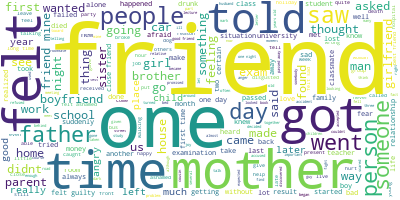

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data_clean['transcript'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Data Transformation: Corpus and Dictionary

In [0]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 6), (3, 8), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 1), (13, 1), (14, 11), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 2), (21, 1), (22, 5), (23, 3), (24, 28), (25, 1), (26, 1), (27, 3), (28, 7), (29, 5), (30, 1), (31, 1), (32, 4), (33, 2), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 3), (42, 1), (43, 2), (44, 1), (45, 3), (46, 3), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 6), (53, 1), (54, 4), (55, 1), (56, 1), (57, 1), (58, 1), (59, 4), (60, 11), (61, 6), (62, 5), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 11), (72, 2), (73, 1), (74, 2), (75, 10), (76, 1), (77, 1), (78, 8), (79, 19), (80, 14), (81, 2), (82, 60), (83, 1), (84, 4), (85, 189), (86, 3), (87, 2), (88, 1), (89, 5), (90, 1), (91, 1), (92, 1), (93, 8), (94, 2), (95, 3), (96, 3), (97, 1), (98, 3), (99, 2), (100, 3), (101, 1), (102, 1), (103, 3), (104, 2), (105, 13), (106, 1), (107, 2), (108, 1), (109, 1

## Base Model

In [0]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=8, random_state=100,
                                       chunksize=100,passes=10,per_word_topics=True)

In [0]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"friend" + 0.019*"feel" + 0.013*"see" + 0.012*"get" + 0.010*"go" + '
  '0.009*"time" + 0.008*"tell" + 0.008*"come" + 0.007*"people" + 0.007*"make"'),
 (1,
  '0.001*"friend" + 0.000*"feel" + 0.000*"time" + 0.000*"go" + 0.000*"get" + '
  '0.000*"come" + 0.000*"day" + 0.000*"tell" + 0.000*"find" + 0.000*"first"'),
 (2,
  '0.000*"friend" + 0.000*"go" + 0.000*"time" + 0.000*"feel" + 0.000*"see" + '
  '0.000*"come" + 0.000*"get" + 0.000*"would" + 0.000*"home" + 0.000*"tell"'),
 (3,
  '0.017*"go" + 0.013*"friend" + 0.011*"night" + 0.010*"angry" + 0.010*"would" '
  '+ 0.009*"fear" + 0.009*"feel" + 0.009*"car" + 0.009*"come" + 0.009*"home"'),
 (4,
  '0.001*"feel" + 0.001*"friend" + 0.001*"go" + 0.001*"see" + 0.001*"would" + '
  '0.001*"night" + 0.001*"fear" + 0.001*"time" + 0.000*"alone" + 0.000*"home"'),
 (5,
  '0.003*"stupefy" + 0.002*"astonish" + 0.002*"flabbergast" + 0.002*"astound" '
  '+ 0.002*"daze" + 0.002*"stun" + 0.002*"get" + 0.001*"beat" + 0.001*"stupid" '
  '+ 0.001*"

## Compute Model Perplexity and Coherence Score

In [0]:
## Bseline Coherence

from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3256959144196102


## Hyperparameter Tuning

In [0]:
## Number of Topics (K)
## Dirichlet hyperparameter alpha: Document-Topic Density
## Dirichlet hyperparameter beta: Word-Topic Density

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10, random_state=100,
                                           chunksize=100,passes=10,alpha=a, eta=b,per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [0]:
## call the function, and iterate it over the range of topics, alpha, and beta parameter values

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 8
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = int(len(corpus))
# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
corpus_sets = [gensim.utils.ClippedCorpus(corpus,int( num_of_docs*0.75)), corpus]
               
corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],'Topics': [], 'Alpha': [],'Beta': [],'Coherence': []}

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
 67%|██████▋   | 360/540 [31:26<15:43,  5.24s/it]


In [0]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word,num_topics=8, 
                                       random_state=100,chunksize=100, passes=10,alpha=0.01,eta=0.9)

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 19.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a9ba16e446707c9eaf6ea4e3306d730cabec22a16c86b816e399ccbf2f185902
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=0e19694f13aec72b1f2486c24a2a776d208e4d241ac0e3105781bf644b7a6e49
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.159952 -0.001921       1        1  62.130417
7     -0.120564  0.033210       2        1  23.873671
3     -0.063465 -0.044230       3        1  13.898967
5      0.068503  0.003036       4        1   0.096458
6      0.068444  0.002756       5        1   0.000124
4      0.067735  0.002524       6        1   0.000124
2      0.069793  0.002200       7        1   0.000124
1      0.069506  0.002426       8        1   0.000124, topic_info=        Term         Freq        Total Category  logprob  loglift
918       go   673.000000   673.000000  Default  30.0000  30.0000
799     feel   954.000000   954.000000  Default  29.0000  29.0000
1434   night   201.000000   201.000000  Default  28.0000  28.0000
873   friend  1060.000000  1060.000000  Default  27.0000  27.0000
951   guilty   139.000000   139.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2400    want     0.000012   240.578415   Topic8  -8.7677  -3.1798
1877     sad     0.000012   132.192245   Topic8  -8.7739  -2.5872
453    could     0.000012   285.295807   Topic8  -8.7662  -3.3488
914     girl     0.000012   250.915543   Topic8  -8.7688  -3.2230
1887     say     0.000012   231.857605   Topic8  -8.7693  -3.1444

[539 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
17        1  0.264316  accident
17        2  0.417341  accident
17        3  0.319961  accident
24        1  0.884868    accuse
24        2  0.082313    accuse
...     ...       ...       ...
2450      2  0.240046     would
2450      3  0.190280     would
2463      1  0.654918      year
2463      2  0.275316      year
2463      3  0.070915      year

[699 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 4, 6, 7, 5, 3, 2])

# TF-IDF

In [0]:
!pip install num2words

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [0]:
title='sample_data'
folders = [x[0] for x in os.walk(str(os.getcwd())+'/'+title+'/')]
folders[0] = folders[0][:len(folders[0])-1]

In [0]:
folders

['/content/sample_data']

In [0]:
processed_text = []
processed_title = []

for i in dataset[:N]:
    file = open(i[0], 'r', encoding="utf8", errors='ignore')
    text = file.read().strip()
    file.close()

    processed_text.append(word_tokenize(str(preprocess(text))))
    processed_title.append(word_tokenize(str(preprocess(i[1]))))

In [0]:
DF = {}

for i in range(len(data_lemmatized)):
    tokens = data_lemmatized[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

    tokens = processed_title[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])

TypeError: ignored

In [0]:
for i in DF:
  DF[i]=len(DF[i])
DF

{'obviously': 5,
 'unjustly': 5,
 'treat': 6,
 'possibility': 5,
 'elucidate': 1,
 'car': 7,
 'overtake': 2,
 'force': 7,
 'drive': 7,
 'road': 7,
 'one': 6,
 'accuse': 6,
 'do': 7,
 'friend': 7,
 'torture': 2,
 'animal': 4,
 'partner': 7,
 'attack': 5,
 'lose': 7,
 'tooth': 3,
 'unjust': 4,
 'accusation': 2,
 'direct': 5,
 'way': 7,
 'act': 7,
 'close': 7,
 'hear': 7,
 'radio': 6,
 'end': 7,
 'catastrophe': 1,
 'several': 7,
 'people': 7,
 'die': 7,
 'could': 7,
 'understand': 7,
 'normal': 5,
 'behave': 7,
 'summer': 7,
 'job': 7,
 'look': 7,
 'particular': 7,
 'learn': 7,
 'speak': 7,
 'lock': 5,
 'work': 7,
 'elderly': 4,
 'man': 7,
 'complain': 4,
 'unjustifiably': 1,
 'distrust': 1,
 'mad': 6,
 'dad': 6,
 'steal': 7,
 'bike': 4,
 'try': 7,
 'put': 7,
 'hurt': 6,
 'boyfriend': 7,
 'go': 7,
 'away': 7,
 'month': 7,
 'long': 7,
 'holiday': 7,
 'restaurant': 7,
 'observe': 6,
 'gypsy': 1,
 'get': 8,
 'money': 7,
 'cheat': 5,
 'foreigner': 4,
 'non': 1,
 'swedish': 2,
 'anger': 4,
 'h

In [0]:
total_vocab=[x for x in DF]
print(total_vocab)

['obviously', 'unjustly', 'treat', 'possibility', 'elucidate', 'car', 'overtake', 'force', 'drive', 'road', 'one', 'accuse', 'do', 'friend', 'torture', 'animal', 'partner', 'attack', 'lose', 'tooth', 'unjust', 'accusation', 'direct', 'way', 'act', 'close', 'hear', 'radio', 'end', 'catastrophe', 'several', 'people', 'die', 'could', 'understand', 'normal', 'behave', 'summer', 'job', 'look', 'particular', 'learn', 'speak', 'lock', 'work', 'elderly', 'man', 'complain', 'unjustifiably', 'distrust', 'mad', 'dad', 'steal', 'bike', 'try', 'put', 'hurt', 'boyfriend', 'go', 'away', 'month', 'long', 'holiday', 'restaurant', 'observe', 'gypsy', 'get', 'money', 'cheat', 'foreigner', 'non', 'swedish', 'anger', 'hatred', 'expression', 'feel', 'see', 'use', 'catch', 'pour', 'rain', 'last', 'ask', 'help', 'fact', 'time', 'editor', 'change', 'head', 'article', 'write', 'consider', 'derogatory', 'person', 'tv', 'news', 'feature', 'group', 'black', 'whip', 'start', 'student', 'project', 'teacher', 'talk',

In [0]:
from collections import Counter
tf_idf = {}
for i in range(len(data_lemmatized)):
    tokens = data_lemmatized[i]
    counter = Counter(tokens + data_lemmatized[i])
    for token in np.unique(tokens):
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log(N/(df+1))
        tf_idf[doc, token] = tf*idf

NameError: ignored

# LSA

In [0]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [0]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [0]:
## use of above function is not necessary as
## corpus -> 'corpus'
## dictionary -> 'id2word'

In [0]:
## LSA model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [0]:
# LSA Model
number_of_topics=8
words=10

model=create_gensim_lsa_model(data_lemmatized,number_of_topics,words)

[(0, '0.384*"friend" + 0.352*"feel" + 0.258*"go" + 0.184*"get" + 0.183*"time" + 0.171*"see" + 0.157*"tell" + 0.139*"come" + 0.131*"would" + 0.129*"day"'), (1, '0.371*"fear" + 0.345*"night" + 0.261*"afraid" + 0.258*"alone" + 0.227*"car" + 0.207*"go" + -0.200*"friend" + -0.168*"feel" + 0.161*"home" + 0.153*"would"'), (2, '-0.320*"die" + -0.313*"sad" + -0.251*"pass" + -0.212*"year" + 0.183*"guilty" + 0.173*"angry" + -0.146*"death" + -0.143*"love" + -0.141*"good" + -0.139*"joy"'), (3, '-0.378*"see" + -0.298*"disgust" + 0.294*"guilty" + 0.233*"die" + 0.221*"sad" + -0.193*"get" + 0.187*"mother" + -0.172*"disgusted" + -0.167*"people" + -0.137*"man"'), (4, '-0.318*"die" + -0.305*"disgust" + -0.298*"sad" + -0.220*"see" + 0.200*"joy" + 0.184*"happy" + 0.180*"get" + -0.177*"disgusted" + 0.155*"exam" + -0.149*"man"'), (5, '0.578*"angry" + -0.417*"feel" + -0.248*"guilty" + 0.194*"friend" + 0.187*"anger" + -0.170*"ashamed" + 0.120*"brother" + 0.104*"try" + 0.092*"leave" + -0.089*"disgust"'), (6, '0.

In [0]:
coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_value = coherencemodel.get_coherence()

print('\nCoherence Score: ', coherence_value)


Coherence Score:  0.37625143042493847


In [0]:
## visualize coherence

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [0]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

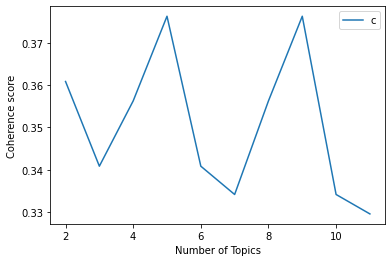

In [0]:
start,stop,step=2,12,1
plot_graph(data_lemmatized,start,stop,step)

# NMF

In [0]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,abandoned,abdomen,abdominal,abhor,abhorr,abhorred,abhorrence,abhorrent,abilities,ability,able,abnormal,abomin,abominable,abominably,abominate,abomination,aboriginal,aborted,abortion,aboveboard,abroad,abrupt,abruptely,abruptly,absailing,abscence,absence,absent,absentminded,absentmindedness,absolutely,absurd,abuse,abused,abusing,abusive,abut,academic,...,yielding,york,young,younger,youngest,youngish,youngsters,youngstters,yournals,youth,youths,yr,yrs,yucki,yucky,yugoslavia,yukky,zaire,zalu,zambezi,zambia,zcbc,zeal,zealand,zealander,zealous,zeeland,zemba,zero,zesco,zest,zestfulness,zhu,zigzagging,zip,zipper,zomba,zombies,zone,zoophiliac
anger,0,1,0,0,1,1,0,1,0,2,4,8,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,2,3,1,1,1,0,...,1,0,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
disgust,1,1,0,0,0,1,1,0,2,0,3,4,0,1,1,1,0,0,1,2,1,1,1,0,0,0,0,0,2,0,0,0,1,0,1,2,3,0,0,1,...,0,0,21,5,1,0,2,0,0,2,0,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
fear,0,1,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,3,...,0,1,13,4,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
guilt,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,2,0,3,0,0,1,0,0,1,2,0,0,1,0,0,0,0,0,0,0,...,0,0,15,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
joy,0,0,1,0,0,0,0,0,0,1,0,10,0,0,0,0,0,0,0,0,1,0,13,0,0,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,...,0,0,3,1,1,1,0,0,0,1,0,1,5,0,0,1,0,1,0,0,4,0,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
sadness,0,0,0,1,0,0,0,0,0,1,1,12,0,0,0,0,0,0,0,0,0,0,6,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3,...,0,2,10,8,0,0,0,0,1,0,0,1,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shame,1,0,0,1,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,2,1,1,1,3,0,0,0,0,1,0,1,...,0,0,15,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0
surprise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data=data_dtm.transpose()
data.head()

,anger,disgust,fear,guilt,joy,sadness,shame,surprise
aa,0,1,0,0,0,0,1,0
abandoned,1,1,1,0,0,0,0,0
abdomen,0,0,0,0,1,0,0,0
abdominal,0,0,0,0,0,1,1,0
abhor,1,0,0,0,0,0,0,0


In [0]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# top_dict

In [0]:
# Print the top 15 words said by each comedian
for words, top_words in top_dict.items():
    print(words)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

anger
angry, friend, did, told, time, got, felt, friends, people, person, mother, day, didnt, brother
---
disgust
disgusted, saw, felt, people, friend, man, disgust, did, friends, person, drunk, like, time, got
---
fear
night, afraid, car, fear, home, felt, time, did, house, friend, going, went, dark, day
---
guilt
felt, guilty, friend, did, mother, time, told, friends, went, home, parents, day, got, didnt
---
joy
friend, got, time, passed, felt, happy, joy, school, good, university, year, friends, exam, came
---
sadness
died, sad, friend, felt, time, away, father, death, years, close, mother, friends, home, did
---
shame
ashamed, felt, friend, time, did, told, friends, people, mother, day, shame, class, person, asked
---
surprise
awe, stupid, stun, wonderful, bewild, wonderfully, stunned, wonderment, wondrous, wondrously, stupefact, stupefaction, stupefi, stupefied
---


In [0]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
# words

In [0]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('friend', 7),
 ('time', 7),
 ('got', 7),
 ('felt', 7),
 ('friends', 7),
 ('day', 7),
 ('school', 7),
 ('did', 6),
 ('told', 6),
 ('went', 6),
 ('home', 6),
 ('came', 5),
 ('people', 4),
 ('person', 4),
 ('mother', 4),
 ('didnt', 4),
 ('father', 4),
 ('boyfriend', 4),
 ('having', 4),
 ('girl', 4),
 ('asked', 3),
 ('car', 3),
 ('saw', 3),
 ('feel', 3),
 ('thought', 3),
 ('brother', 2),
 ('wanted', 2),
 ('work', 2),
 ('said', 2),
 ('sister', 2),
 ('man', 2),
 ('know', 2),
 ('parents', 2),
 ('later', 2),
 ('passed', 2),
 ('heard', 2),
 ('years', 2),
 ('girlfriend', 2),
 ('angry', 1),
 ('anger', 1),
 ('things', 1),
 ('just', 1),
 ('disgusted', 1),
 ('disgust', 1),
 ('drunk', 1),
 ('like', 1),
 ('bus', 1),
 ('way', 1),
 ('woman', 1),
 ('tried', 1),
 ('started', 1),
 ('film', 1),
 ('night', 1),
 ('afraid', 1),
 ('fear', 1),
 ('house', 1),
 ('going', 1),
 ('dark', 1),
 ('walking', 1),
 ('scared', 1),
 ('suddenly', 1),
 ('road', 1),
 ('accident', 1),
 ('frightened', 1),
 ('guilty', 1),
 ('gui

In [0]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['friend', 'time', 'got', 'felt', 'friends', 'day', 'school']

In [0]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [0]:
# data_stop.head()
data_tran_stop=data.transpose()

In [0]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

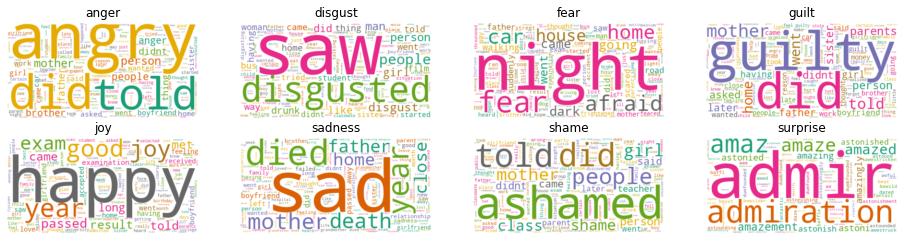

In [0]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame', 'surprise']

# Create subplots for each comedian
for index, feel in enumerate(data.columns):
    wc.generate(data_clean.transcript[feel])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [0]:
from sklearn.decomposition import NMF

model_nmf=NMF(n_components=8)
model_nmf.fit(data_tran_stop)

nmf_features=model_nmf.transform(data_tran_stop)

In [0]:
model_nmf.components_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04696376, 0.        , ..., 0.04696376, 0.04696376,
        0.        ],
       ...,
       [0.        , 0.04212803, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03999683, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])